In [1]:
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [2]:
B_data=pd.read_csv("../../dataSet/B_data_time.csv")
T_data=pd.read_csv("../../dataSet/T_data_time.csv")

### B 样本数据处理

In [4]:
B_data.median()

Volume(%)          103.363
Height(um)         111.043
Area(%)            101.887
OffsetX(mm)         -0.002
OffsetY(mm)          0.006
Panel                5.500
CYCLE                5.000
BARCODE_INDEX    37189.500
dtype: float64

In [4]:
B_data.describe()

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,BARCODE_INDEX
count,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06
mean,1.039985e+02,1.110993e+02,9.964610e+01,-1.813802e-03,9.221980e-03,5.500000e+00,4.855856e+00,3.301402e+04
std,1.318588e+01,8.986011e+00,9.766828e+00,8.589230e-03,1.557765e-02,2.872282e+00,4.166050e-01,1.258870e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.490000e-01,-1.170000e-01,1.000000e+00,4.000000e+00,1.361100e+04
25%,9.493500e+01,1.050500e+02,9.299300e+01,-7.000000e-03,-2.000000e-03,3.000000e+00,5.000000e+00,1.400000e+04
50%,1.033630e+02,1.110430e+02,1.018870e+02,-2.000000e-03,6.000000e-03,5.500000e+00,5.000000e+00,3.718950e+04
75%,1.123760e+02,1.169960e+02,1.071800e+02,4.000000e-03,1.700000e-02,8.000000e+00,5.000000e+00,4.380900e+04
max,1.858140e+02,1.893380e+02,1.477700e+02,4.500000e-02,1.130000e-01,1.000000e+01,7.000000e+00,4.419700e+04


In [56]:
B_data["Height(um)"].median()

111.043

In [57]:
B_data["Height(um)"].quantile(0.5)

111.043

##### 使用高度作为特征

In [70]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in B_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Height(um)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Height(um)"])
    larger_num.append(values["Height(um)"].nlargest(3,keep='all').values)
    smallr_num.append(values["Height(um)"].nsmallest(3,keep='all').values)
    inx.append(index)
    new_sum.append(values["Height(um)"].sum())
    new_means.append(values["Height(um)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Height(um)"].median())
    new_25.append(values["Height(um)"].quantile(0.25))
    new_std.append(values["Height(um)"].std())
    new_75.append(values["Height(um)"].quantile(0.75))

In [71]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}

In [72]:
d=pd.DataFrame(d)

In [73]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),d],axis=1)

In [74]:
data

,0,1,2,0,1,2,3,inx,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,140.698,139.023,138.796,53.628,57.328,58.134,NaN,13611,460326.650,109.082145,109.5525,9.151918,103.26825,115.74350,PASS,2021/8/10,05:46:14
1,140.705,139.696,138.822,51.964,79.583,81.263,NaN,13612,453542.329,107.474486,107.3065,8.190264,102.35975,112.32775,PASS,2021/8/10,05:46:38
2,132.849,130.807,130.631,55.559,63.642,77.627,NaN,13613,452823.397,107.304123,107.5505,7.400663,102.66275,112.41650,PASS,2021/8/10,05:46:56
3,161.276,141.266,138.993,54.865,64.830,66.626,NaN,13614,454109.897,107.608980,107.3380,8.858526,102.02675,113.01600,FAIL,2021/8/10,05:51:09
4,138.036,137.112,135.809,76.208,76.228,78.440,NaN,13615,468455.325,111.008371,111.3380,8.559212,105.24075,117.15700,PASS,2021/8/10,05:51:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,141.260,139.282,137.128,84.194,85.930,86.669,NaN,44193,482252.200,114.277773,114.7390,8.367514,108.56750,120.19025,GOOD,2021/8/27,15:37:04
1550,139.952,137.743,136.053,83.202,84.987,86.539,NaN,44194,474004.258,112.323284,112.5960,7.361653,107.72775,117.25500,GOOD,2021/8/27,15:37:19
1551,147.236,145.811,140.606,84.510,86.579,87.304,NaN,44195,476563.122,112.929650,113.2150,8.486066,107.05475,118.82525,GOOD,2021/8/27,15:37:42
1552,136.782,135.027,133.899,83.066,85.468,86.684,NaN,44196,462717.277,109.648644,109.8935,7.096836,105.33225,114.14575,GOOD,2021/8/27,15:38:03


In [75]:
data

,0,1,2,0,1,2,3,inx,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,140.698,139.023,138.796,53.628,57.328,58.134,NaN,13611,460326.650,109.082145,109.5525,9.151918,103.26825,115.74350,PASS,2021/8/10,05:46:14
1,140.705,139.696,138.822,51.964,79.583,81.263,NaN,13612,453542.329,107.474486,107.3065,8.190264,102.35975,112.32775,PASS,2021/8/10,05:46:38
2,132.849,130.807,130.631,55.559,63.642,77.627,NaN,13613,452823.397,107.304123,107.5505,7.400663,102.66275,112.41650,PASS,2021/8/10,05:46:56
3,161.276,141.266,138.993,54.865,64.830,66.626,NaN,13614,454109.897,107.608980,107.3380,8.858526,102.02675,113.01600,FAIL,2021/8/10,05:51:09
4,138.036,137.112,135.809,76.208,76.228,78.440,NaN,13615,468455.325,111.008371,111.3380,8.559212,105.24075,117.15700,PASS,2021/8/10,05:51:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,141.260,139.282,137.128,84.194,85.930,86.669,NaN,44193,482252.200,114.277773,114.7390,8.367514,108.56750,120.19025,GOOD,2021/8/27,15:37:04
1550,139.952,137.743,136.053,83.202,84.987,86.539,NaN,44194,474004.258,112.323284,112.5960,7.361653,107.72775,117.25500,GOOD,2021/8/27,15:37:19
1551,147.236,145.811,140.606,84.510,86.579,87.304,NaN,44195,476563.122,112.929650,113.2150,8.486066,107.05475,118.82525,GOOD,2021/8/27,15:37:42
1552,136.782,135.027,133.899,83.066,85.468,86.684,NaN,44196,462717.277,109.648644,109.8935,7.096836,105.33225,114.14575,GOOD,2021/8/27,15:38:03


In [76]:
label=["max0", "max1",  "max2","min0", "min1","min2","min3",'inx',    'new_sum',  'new_means', 'new_median',
          'new_std',     'new_25',     'new_75',  'JOBRESULT',         'Da',
           'S_TIME']

In [77]:
data.columns=label

In [78]:
data.drop(["min3","inx"],axis=1,inplace=True)

In [79]:
data

,max0,max1,max2,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,140.698,139.023,138.796,53.628,57.328,58.134,460326.650,109.082145,109.5525,9.151918,103.26825,115.74350,PASS,2021/8/10,05:46:14
1,140.705,139.696,138.822,51.964,79.583,81.263,453542.329,107.474486,107.3065,8.190264,102.35975,112.32775,PASS,2021/8/10,05:46:38
2,132.849,130.807,130.631,55.559,63.642,77.627,452823.397,107.304123,107.5505,7.400663,102.66275,112.41650,PASS,2021/8/10,05:46:56
3,161.276,141.266,138.993,54.865,64.830,66.626,454109.897,107.608980,107.3380,8.858526,102.02675,113.01600,FAIL,2021/8/10,05:51:09
4,138.036,137.112,135.809,76.208,76.228,78.440,468455.325,111.008371,111.3380,8.559212,105.24075,117.15700,PASS,2021/8/10,05:51:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,141.260,139.282,137.128,84.194,85.930,86.669,482252.200,114.277773,114.7390,8.367514,108.56750,120.19025,GOOD,2021/8/27,15:37:04
1550,139.952,137.743,136.053,83.202,84.987,86.539,474004.258,112.323284,112.5960,7.361653,107.72775,117.25500,GOOD,2021/8/27,15:37:19
1551,147.236,145.811,140.606,84.510,86.579,87.304,476563.122,112.929650,113.2150,8.486066,107.05475,118.82525,GOOD,2021/8/27,15:37:42
1552,136.782,135.027,133.899,83.066,85.468,86.684,462717.277,109.648644,109.8935,7.096836,105.33225,114.14575,GOOD,2021/8/27,15:38:03


###### 保存特征高度的数据

In [80]:
job = []
result = []
j = 1
t = 1
for i in data["JOBRESULT"]:
    job.append(j)
    j += 1
    result.append(t)
    if i ==" FAIL":
        job.append(j)
        result.append(t)
        t +=1
        j = 1

In [81]:
data["time"] = pd.Series(job)
data["id"] = pd.Series(result)

In [82]:
data.head(10)

,max0,max1,max2,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME,time,id
0,140.698,139.023,138.796,53.628,57.328,58.134,460326.650,109.082145,109.5525,9.151918,103.26825,115.74350,PASS,2021/8/10,05:46:14,1,1
1,140.705,139.696,138.822,51.964,79.583,81.263,453542.329,107.474486,107.3065,8.190264,102.35975,112.32775,PASS,2021/8/10,05:46:38,2,1
2,132.849,130.807,130.631,55.559,63.642,77.627,452823.397,107.304123,107.5505,7.400663,102.66275,112.41650,PASS,2021/8/10,05:46:56,3,1
3,161.276,141.266,138.993,54.865,64.830,66.626,454109.897,107.608980,107.3380,8.858526,102.02675,113.01600,FAIL,2021/8/10,05:51:09,4,1
4,138.036,137.112,135.809,76.208,76.228,78.440,468455.325,111.008371,111.3380,8.559212,105.24075,117.15700,PASS,2021/8/10,05:51:50,5,1
5,139.382,135.171,134.233,74.263,76.147,78.939,447727.226,106.096499,105.9040,8.099976,101.01875,111.08700,PASS,2021/8/10,05:55:13,1,2
6,136.618,136.587,135.699,83.683,84.839,86.499,466337.241,110.506455,110.4330,7.489428,105.11950,115.83650,GOOD,2021/8/10,05:56:18,2,2
7,139.535,138.629,137.129,79.995,82.752,82.799,452742.579,107.284971,107.5435,8.835544,101.14750,113.15600,PASS,2021/8/10,05:56:34,3,2
8,135.069,133.688,133.486,85.451,86.171,88.286,465565.969,110.323689,110.3125,7.353411,105.05400,115.33500,GOOD,2021/8/10,05:57:54,4,2
9,135.939,134.984,134.560,77.551,81.518,83.798,455784.951,108.005913,108.4485,8.941621,101.86300,113.90925,GOOD,2021/8/10,05:58:10,5,2


In [84]:
data1=data[['id', 'time','max0', 'max1', 'max2', 'min0', 'min1', 'min2', 'new_sum',
       'new_means', 'new_median', 'new_std', 'new_25', 'new_75']]

In [85]:
data1.to_csv("data_B_table_Height.txt", sep=' ',index=False, header=None)

In [86]:
data1

,id,time,max0,max1,max2,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75
0,1,1,140.698,139.023,138.796,53.628,57.328,58.134,460326.650,109.082145,109.5525,9.151918,103.26825,115.74350
1,1,2,140.705,139.696,138.822,51.964,79.583,81.263,453542.329,107.474486,107.3065,8.190264,102.35975,112.32775
2,1,3,132.849,130.807,130.631,55.559,63.642,77.627,452823.397,107.304123,107.5505,7.400663,102.66275,112.41650
3,1,4,161.276,141.266,138.993,54.865,64.830,66.626,454109.897,107.608980,107.3380,8.858526,102.02675,113.01600
4,1,5,138.036,137.112,135.809,76.208,76.228,78.440,468455.325,111.008371,111.3380,8.559212,105.24075,117.15700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,15,14,141.260,139.282,137.128,84.194,85.930,86.669,482252.200,114.277773,114.7390,8.367514,108.56750,120.19025
1550,15,15,139.952,137.743,136.053,83.202,84.987,86.539,474004.258,112.323284,112.5960,7.361653,107.72775,117.25500
1551,15,16,147.236,145.811,140.606,84.510,86.579,87.304,476563.122,112.929650,113.2150,8.486066,107.05475,118.82525
1552,15,17,136.782,135.027,133.899,83.066,85.468,86.684,462717.277,109.648644,109.8935,7.096836,105.33225,114.14575


In [69]:
def euclidean(p,q):
#如果两数据集数目不同，计算两者之间都对应有的数
    #计算欧几里德距离,并将其标准化
#     e = sum([(p[i] - q[i])**2 for i in range(len(p))])
    e = np.mean([(p[i] - q[i]) for i in range(len(p))])
    return e

In [19]:
dist =data[["max1",  "max2","min0", "min1","min2",  'new_sum',  'new_means', 'new_median',
          'new_std','new_25',     'new_75']]

In [20]:
dist[data["JOBRESULT"]!=" FAIL"].mean().values

array([1.39657781e+02, 1.38504799e+02, 8.22284019e+01, 8.41801701e+01,
       8.52395260e+01, 4.68802009e+05, 1.11090523e+02, 1.11247921e+02,
       8.48092535e+00, 1.05322035e+02, 1.16807971e+02])

In [70]:
x=[]
y=[]
def LCA():
    for i in range(1553):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist.iloc[i+1,:].values))


LCA()

In [22]:
# for i in range(len(x)):
#     if x[i]==" FAIL":
#         print(x[i],y[i])
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x;
l=[MaxMinNormalization(y[i],min(y),max(y)) for i in range(len(x))]

In [23]:
y=l

In [71]:
y

[1132.243427281217,
 119.87603560953197,
 -214.66895343137097,
 -2393.3138461518424,
 3458.199351350311,
 -3104.5322763298896,
 2267.6798945932537,
 -2138.966847480812,
 1631.371386175814,
 -1640.3163954317315,
 2426.5474556872014,
 -1167.0595420286904,
 1331.7053664744535,
 -1164.3777008994782,
 -788.1258655449737,
 -1311.9762971886873,
 3778.9791198826097,
 -4205.331275016266,
 -233.29238623780557,
 -799.9929358009578,
 2897.585915689669,
 -1126.392933976797,
 806.4732218475609,
 -1686.9625907191419,
 2239.527719887914,
 -1566.5177213951956,
 -49.61306993519742,
 -728.2773460722105,
 2122.150597856195,
 -3524.516363388442,
 3114.7077078719776,
 -1741.1856998910087,
 2449.1924246472877,
 -3582.479463901971,
 2442.797155928574,
 -1491.9588268601547,
 887.619528528519,
 -793.2827106142112,
 1968.5297493256458,
 -423.66618540951936,
 865.6333877725571,
 -1721.8488577187118,
 1760.4418415738974,
 -1872.0153341929938,
 1573.5582983665317,
 -1950.0905791555508,
 1681.6789588001086,
 -1170.4

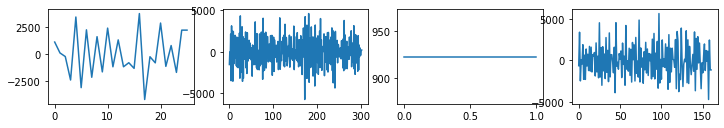

In [73]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
        plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(1,0)
        c+=572
        x1.clear()
        y1.clear()

In [279]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist[data["JOBRESULT"]!=" FAIL"].mean().values))
LCA()

##### 使用体积比较

In [122]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in B_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Volume(%)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Volume(%)"])
    larger_num.append(values["Volume(%)"].nlargest(3,keep='all').values)
    
    smallr_num.append(values["Volume(%)"].nsmallest(3,keep='all').values)
    inx.append(index)
    new_sum.append(values["Volume(%)"].sum())
    new_means.append(values["Volume(%)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Volume(%)"].median())
    new_25.append(values["Volume(%)"].quantile(0.25))
    new_std.append(values["Volume(%)"].std())
    new_75.append(values["Volume(%)"].quantile(0.75))

In [123]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}
d=pd.DataFrame(d)

In [124]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),d],axis=1)

In [125]:
label=["max0", "max1",  "max2","max3","min0", "min1","min2","min3",'inx',    'new_sum',  'new_means', 'new_median',
          'new_std',     'new_25',     'new_75',  'JOBRESULT',         'Da',
           'S_TIME']

In [126]:
data.columns

Index([           0,            1,            2,            3,            0,
                  1,            2,            3,        'inx',    'new_sum',
        'new_means', 'new_median',    'new_std',     'new_25',     'new_75',
        'JOBRESULT',         'Da',     'S_TIME'],
      dtype='object')

In [127]:
data.columns=label
data.drop(["min3","inx"],axis=1,inplace=True)

In [128]:
data

,max0,max1,max2,max3,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,139.268,138.064,135.674,NaN,8.446,8.592,8.771,395324.472,93.678785,94.5025,16.003553,84.83975,104.42725,PASS,2021/8/10,05:46:14
1,137.375,136.655,136.251,NaN,5.948,34.144,36.755,406000.342,96.208612,96.0480,13.284353,87.40050,104.19475,PASS,2021/8/10,05:46:38
2,138.485,134.663,133.257,NaN,7.254,16.911,31.957,419748.300,99.466422,99.7465,13.051119,91.60400,108.20175,PASS,2021/8/10,05:46:56
3,137.199,135.841,135.807,NaN,6.833,14.474,14.908,393974.712,93.358936,93.8350,14.926102,84.85075,102.37100,FAIL,2021/8/10,05:51:09
4,142.710,139.044,137.254,NaN,32.251,32.562,34.676,419308.708,99.362253,99.0670,14.324857,90.28425,109.15200,PASS,2021/8/10,05:51:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,153.533,148.232,147.125,NaN,68.014,68.120,69.905,448120.046,106.189584,106.6155,13.348954,96.14050,115.58500,GOOD,2021/8/27,15:37:04
1550,148.717,144.197,141.695,NaN,70.940,75.639,76.556,459499.707,108.886186,108.5510,11.372465,101.50200,115.80175,GOOD,2021/8/27,15:37:19
1551,149.981,146.277,144.215,NaN,68.931,69.221,69.308,446621.664,105.834518,105.7190,12.441057,96.70750,113.80850,GOOD,2021/8/27,15:37:42
1552,144.617,142.364,141.768,NaN,68.770,69.617,71.288,444846.287,105.413812,104.5205,10.803353,98.26975,112.08525,GOOD,2021/8/27,15:38:03


In [129]:
job = []
result = []
j = 1
t = 1
for i in data["JOBRESULT"]:
    job.append(j)
    j += 1
    result.append(t)
    if i ==" FAIL":
        job.append(j)
        result.append(t)
        t +=1
        j = 1

In [130]:
data["time"] = pd.Series(job)
data["id"] = pd.Series(result)

In [131]:
data1=data[['id', 'time','max0', 'max1', 'max2', 'min0', 'min1', 'min2', 'new_sum',
       'new_means', 'new_median', 'new_std', 'new_25', 'new_75']]

###### 保存体积数据

In [132]:
data1.to_csv("data_B_table_Vo.txt", sep=' ',index=False, header=None)

In [ ]:
####

In [172]:
x=[]
y=[]
def LCA():
    for i in range(1553):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist.iloc[i+1,:].values))


LCA()

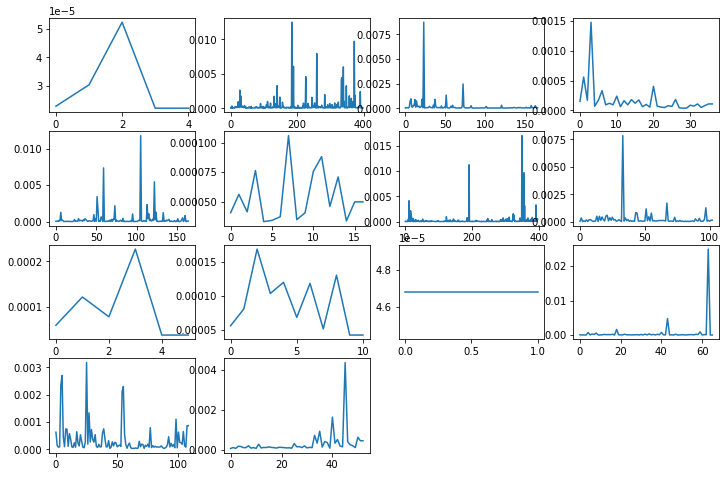

In [175]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
        plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(0.0001,0)
        c+=572
        x1.clear()
        y1.clear()

In [174]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist[data["JOBRESULT"]!=" FAIL"].mean().values))
LCA()

##### 使用面积

In [176]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in B_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Area(%)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Area(%)"])
    larger_num.append(values["Area(%)"].nlargest(10,keep='all').values)
    
    smallr_num.append(values["Area(%)"].nlargest(10,keep='all').values)
    inx.append(index)
    new_sum.append(values["Area(%)"].sum())
    new_means.append(values["Area(%)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Area(%)"].median())
    new_25.append(values["Area(%)"].quantile(0.25))
    new_std.append(values["Area(%)"].std())
    new_75.append(values["Area(%)"].quantile(0.75))

In [177]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}
d=pd.DataFrame(d)
data=d

In [178]:
data

,inx,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,13611,385054.254,91.245084,94.2075,13.314334,82.86500,101.34300,PASS,2021/8/10,05:46:14
1,13612,401717.144,95.193636,97.3170,10.303872,88.26400,103.11125,PASS,2021/8/10,05:46:38
2,13613,416346.298,98.660260,100.3010,11.328446,91.39300,107.31850,PASS,2021/8/10,05:46:56
3,13614,389324.955,92.257098,95.4430,12.505266,84.04100,101.87425,FAIL,2021/8/10,05:51:09
4,13615,402017.110,95.264718,98.0275,11.707602,86.38825,104.76550,PASS,2021/8/10,05:51:50
...,...,...,...,...,...,...,...,...,...,...
1549,44193,417534.469,98.941817,101.6740,10.453967,89.65400,107.50800,GOOD,2021/8/27,15:37:04
1550,44194,435372.439,103.168824,104.6020,8.262041,99.05575,108.98500,GOOD,2021/8/27,15:37:19
1551,44195,420980.839,99.758493,101.2140,9.148826,92.29250,107.16500,GOOD,2021/8/27,15:37:42
1552,44196,431795.720,102.321261,104.0880,8.000572,98.40300,108.08500,GOOD,2021/8/27,15:38:03


In [179]:
dist =data[['new_sum', 'new_means', 'new_median', 'new_std', 'new_25',
       'new_75']]

In [180]:
dist

,new_sum,new_means,new_median,new_std,new_25,new_75
0,385054.254,91.245084,94.2075,13.314334,82.86500,101.34300
1,401717.144,95.193636,97.3170,10.303872,88.26400,103.11125
2,416346.298,98.660260,100.3010,11.328446,91.39300,107.31850
3,389324.955,92.257098,95.4430,12.505266,84.04100,101.87425
4,402017.110,95.264718,98.0275,11.707602,86.38825,104.76550
...,...,...,...,...,...,...
1549,417534.469,98.941817,101.6740,10.453967,89.65400,107.50800
1550,435372.439,103.168824,104.6020,8.262041,99.05575,108.98500
1551,420980.839,99.758493,101.2140,9.148826,92.29250,107.16500
1552,431795.720,102.321261,104.0880,8.000572,98.40300,108.08500


In [181]:
x=[]
y=[]
def LCA():
    for i in range(1553):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist.iloc[i+1,:].values))
LCA()

In [183]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist[data["JOBRESULT"]!=" FAIL"].mean().values))
LCA()

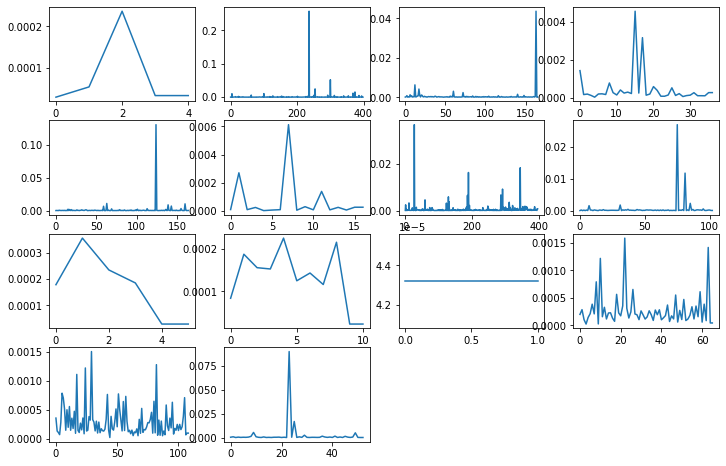

In [184]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
        plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(0.0001,0)
        c+=572
        x1.clear()
        y1.clear()

### T 样本处理

##### 使用高度

In [133]:
T_data=T_data[T_data["JOB"]=="GT30-V2.8-00-TOP-10"]

In [134]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in T_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Height(um)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Height(um)"])
    larger_num.append(values["Height(um)"].nlargest(3,keep='all').values)
    
    smallr_num.append(values["Height(um)"].nsmallest(3,keep='all').values)
    inx.append(index)
    new_sum.append(values["Height(um)"].sum())
    new_means.append(values["Height(um)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Height(um)"].median())
    new_25.append(values["Height(um)"].quantile(0.25))
    new_std.append(values["Height(um)"].std())
    new_75.append(values["Height(um)"].quantile(0.75))

In [135]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}

In [136]:
d=pd.DataFrame(d)

In [137]:
d

,inx,new_sum,new_means,new_median,new_std,new_25,new_75,JOBRESULT,Da,S_TIME
0,14063,457809.821,115.317335,117.5895,11.703479,107.53000,123.38650,PASS,2021/8/10,14:15:13
1,14064,447085.909,112.616098,113.2425,11.025148,104.48825,119.58950,GOOD,2021/8/10,14:15:35
2,14065,467510.075,117.760724,118.6885,12.458083,109.95225,126.31975,GOOD,2021/8/10,14:15:51
3,14066,452269.376,113.921757,114.5135,10.767923,106.19200,120.55000,GOOD,2021/8/10,14:16:59
4,14067,467701.703,117.808993,118.4780,12.516585,109.48600,126.61675,GOOD,2021/8/10,14:17:20
...,...,...,...,...,...,...,...,...,...,...
1865,44648,430844.867,108.525155,108.5085,10.065468,101.56450,115.78800,GOOD,2021/8/27,23:55:45
1866,44649,439537.848,110.714823,110.8500,11.892998,102.35450,118.12625,GOOD,2021/8/27,23:57:09
1867,44650,432065.309,108.832572,108.8205,10.583047,101.87200,116.50625,GOOD,2021/8/27,23:57:22
1868,44651,435003.402,109.572645,109.7685,11.801723,100.88075,117.09925,PASS,2021/8/27,23:58:46


In [138]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),d],axis=1)

In [153]:
data.dropna(axis=1,inplace=True)

In [154]:
label=["max0", "max1",  "max2","min0", "min1","min2",'inx',    'new_sum',  'new_means', 'new_median',
          'new_std',     'new_25',     'new_75',  'JOBRESULT',         'Da',
           'S_TIME']

In [155]:
data.columns=label

In [156]:
job = []
result = []
j = 1
t = 1
for i in data["JOBRESULT"]:
    job.append(j)
    j += 1
    result.append(t)
    if i ==" FAIL":
        job.append(j)
        result.append(t)
        t +=1
        j = 1

In [157]:
 
data["time"] = pd.Series(job)
data["id"] = pd.Series(result)

In [158]:
data1=data[['id', 'time','max0', 'max1', 'max2', 'min0', 'min1', 'min2', 'new_sum',
       'new_means', 'new_median', 'new_std', 'new_25', 'new_75']]

###### 使用高度保存数据

In [159]:
data1.to_csv("data_T_table_Height.txt", sep=' ',index=False, header=None)

In [160]:
data1

,id,time,max0,max1,max2,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75
0,1,1,159.739,159.326,149.436,84.246,84.685,84.701,457809.821,115.317335,117.5895,11.703479,107.53000,123.38650
1,1,2,150.058,146.577,146.225,82.746,83.223,83.416,447085.909,112.616098,113.2425,11.025148,104.48825,119.58950
2,1,3,150.910,149.559,149.479,85.390,85.540,87.487,467510.075,117.760724,118.6885,12.458083,109.95225,126.31975
3,1,4,149.702,148.933,147.268,83.861,86.496,86.680,452269.376,113.921757,114.5135,10.767923,106.19200,120.55000
4,1,5,152.552,150.729,150.582,85.994,87.308,88.697,467701.703,117.808993,118.4780,12.516585,109.48600,126.61675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,5,1374,144.113,141.568,139.548,71.690,71.836,72.431,430844.867,108.525155,108.5085,10.065468,101.56450,115.78800
1866,5,1375,151.559,151.454,146.996,68.189,73.135,74.076,439537.848,110.714823,110.8500,11.892998,102.35450,118.12625
1867,5,1376,145.178,143.140,139.862,70.058,70.528,72.066,432065.309,108.832572,108.8205,10.583047,101.87200,116.50625
1868,5,1377,151.268,145.694,145.599,64.453,68.066,69.739,435003.402,109.572645,109.7685,11.801723,100.88075,117.09925


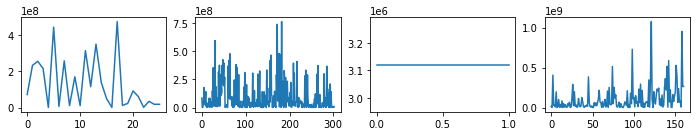

In [37]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == "PASS":
        continue
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
        plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(0.0001,0)
        c+=572
        x1.clear()
        y1.clear()

In [53]:
data.to_csv("../B_data4.csv",index=False)

In [51]:
# for idex,value in B_data.groupby("BARCODE_INDEX"):
# #     print(idex)
# #     print(idex,"\t",value["JOBRESULT"].values[0],pd.DataFrame(value)["Result"].value_counts())
#     for index ,val in pd.DataFrame(value).groupby("Panel"):
#         print(pd.DataFrame(val)["Result"].value_counts())

GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD          410
E.Insuffi.     12
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          421
E.Insuffi.

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
N

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          416
E.Insuffi.      5
E.HeightU       1
Name: Result, dtype: int64
GOOD          416
E.Insuffi.      6
Name: Result, dtype: int64
GOOD          410
E.Insuffi.     12
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          420
E.Insuf

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          413
E.Insuffi.      9
Name: Result, dtype: int64
GOOD          409
E.Insuffi.     13
Name: Result, dtype: int64
GOOD          415
E.Insuffi.      7
Name: Result, dtype: int64
GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          417
E.Insuffi.      5
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Resu

Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          417
E.Insuffi.      5
Name: Result, dtype: int64
GOOD          416
E.Insuffi.      6
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD          416
E.Insuffi.      6
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      2
E.HeightU       1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dt

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dt

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
N

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          414
E.Insuffi.      8
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
N

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
G

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
N

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          418
E.Insuffi.      4
Name: Result, dtype: int64
GOOD          417
E.Insuffi.      5
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: R

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          409
E.Insuffi.     13
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
G

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
N

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD   

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          417
E.Insuffi.      5
Name: Result, dtype: int64
GOOD          418
E.Insuffi.      4
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          420
E.Insuffi.      2
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: i

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result,

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int6

Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD    422
Name: Result, dtype: int64
GOOD          419
E.Insuffi.      3
Name: Result, dtype: int64
GOOD          421
E.Insuffi.      1
Name: Result, dtype: int64
GOOD          404
E.Insuffi.

In [42]:
B_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557875,1:VT3,113.166,110.799,102.136,-0.005,0.016,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557876,1:VT3,131.565,120.853,108.864,0.011,0.002,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557877,1:VT4,124.038,124.045,99.994,-0.015,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58
6557878,1:VT4,92.592,88.401,104.741,-0.003,0.008,GOOD,10,2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44197,15:38:53,15:38:58


In [34]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist[data["JOBRESULT"]!=" FAIL"].mean().values))
LCA()

##### 使用体积比较

In [161]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in T_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Volume(%)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Volume(%)"])
    larger_num.append(values["Volume(%)"].nlargest(3,keep='all').values)
    
    smallr_num.append(values["Volume(%)"].nsmallest(3,keep='all').values)
    inx.append(index)
    new_sum.append(values["Volume(%)"].sum())
    new_means.append(values["Volume(%)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Volume(%)"].median())
    new_25.append(values["Volume(%)"].quantile(0.25))
    new_std.append(values["Volume(%)"].std())
    new_75.append(values["Volume(%)"].quantile(0.75))

In [162]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}
d = pd.DataFrame(d)

In [163]:
data=pd.concat([pd.DataFrame(larger_num),pd.DataFrame(smallr_num),d],axis=1)

In [166]:
data.dropna(axis=1,inplace= True)

In [168]:
data.columns=label

In [169]:
job = []
result = []
j = 1
t = 1
for i in data["JOBRESULT"]:
    job.append(j)
    j += 1
    result.append(t)
    if i ==" FAIL":
        job.append(j)
        result.append(t)
        t +=1
        j = 1
data["time"] = pd.Series(job)
data["id"] = pd.Series(result)

In [170]:
data1=data[['id', 'time','max0', 'max1', 'max2', 'min0', 'min1', 'min2', 'new_sum',
       'new_means', 'new_median', 'new_std', 'new_25', 'new_75']]

In [171]:
data1

,id,time,max0,max1,max2,min0,min1,min2,new_sum,new_means,new_median,new_std,new_25,new_75
0,1,1,146.733,145.696,144.672,57.698,60.994,63.747,428064.276,107.824755,109.2605,13.750686,96.05775,118.36250
1,1,2,161.940,157.440,153.278,71.731,81.049,81.789,443777.458,111.782735,113.3040,13.018555,100.74800,121.23550
2,1,3,154.404,153.903,153.851,71.123,79.720,80.361,468393.640,117.983285,119.9010,14.833327,105.62200,128.72300
3,1,4,159.393,158.836,158.459,74.338,80.263,80.779,456793.627,115.061367,117.0555,13.559220,103.50325,124.92625
4,1,5,158.246,154.661,153.949,80.116,82.406,83.076,468188.789,117.931685,119.9885,13.964365,106.68250,128.21675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,5,1374,148.752,147.672,147.281,62.217,68.018,69.814,446450.513,112.456049,113.3400,12.906125,101.98300,122.20450
1866,5,1375,168.001,162.158,158.877,59.492,68.513,69.364,453691.206,114.279901,115.2915,13.450251,104.06225,123.91275
1867,5,1376,156.344,155.382,152.758,63.161,66.036,69.881,462670.393,116.541661,117.6360,13.374335,106.31350,126.12550
1868,5,1377,164.808,161.697,155.301,53.656,55.188,56.631,444030.737,111.846533,112.9250,13.754439,101.81850,121.68900


###### 保存体积数据集

In [172]:
data1.to_csv("data_T_table_V.txt", sep=' ',index=False, header=None)

In [175]:
len(data1.columns)

14

##### 使用面积

In [204]:
inx =[]
larger_num = []
new_sum = []
new_means = []
smallr_num = []
JOBRESULT=[]
Da = []
S_TIME =[]
new_median=[]
new_std= []
new_25 = []
new_75 = []
for index ,values in T_data.groupby("BARCODE_INDEX"):
#     d[index]=values["Area(%)"].nlargest(3,keep='all').values
    JOBRESULT.append(values["JOBRESULT"].values[0])
#     print(values["Area(%)"])
    larger_num.append(values["Area(%)"].nlargest(10,keep='all').values)
    
    smallr_num.append(values["Area(%)"].nlargest(10,keep='all').values)
    inx.append(index)
    new_sum.append(values["Area(%)"].sum())
    new_means.append(values["Area(%)"].mean())
    Da.append(values["DATE"].values[0])
    S_TIME.append(values["S_TIME"].values[0])
    new_median.append(values["Area(%)"].median())
    new_25.append(values["Area(%)"].quantile(0.25))
    new_std.append(values["Area(%)"].std())
    new_75.append(values["Area(%)"].quantile(0.75))

In [205]:
d={
    "inx":inx,
#     "larger_num":larger_num,
    "new_sum":new_sum,
    "new_means":new_means,
#     "smallr_num":smallr_num,
    "new_median": new_median,
    "new_std": new_std,
    "new_25" : new_25,
    "new_75" : new_75,
    "JOBRESULT":JOBRESULT,
    "Da":Da,
    "S_TIME":S_TIME
}
d = pd.DataFrame(d)

In [207]:
data=d
dist =data[['new_sum', 'new_means', 'new_median', 'new_std', 'new_25',
       'new_75']]

In [208]:
x=[]
y=[]
def LCA():
    for i in range(1553):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist.iloc[i+1,:].values))


LCA()

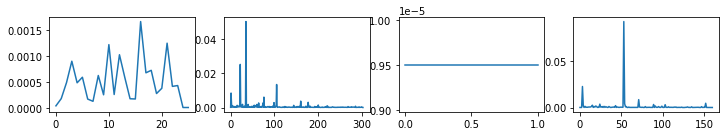

In [212]:
x1=[]
y1=[]
c=16646359
plt.figure(figsize=(12,8))
j=1
for i in range(len(x)):
    x1.append(x[i])
    y1.append(y[i])
    if x[i] == " FAIL":
        x1.append(x[i])
        y1.append(y[i])
        plt.subplot(4,4,j)
        j+=1
        plt.plot(range(len(x1)),y1)
#         plt.xlim(3,2)
#         plt.ylim(1201450221,329364.6719038941)
#         plt.ylim(0.0001,0)
        c+=572
        x1.clear()
        y1.clear()

In [211]:
x=[]
y=[]
def LCA():
    for i in range(1554):
#         if data.loc[:,"JOBRESULT"][i] != " FAIL"
        x.append(data.loc[:,"JOBRESULT"][i])
        y.append(euclidean(dist.iloc[i,:].values,dist[data["JOBRESULT"]!=" FAIL"].mean().values))
LCA()

In [154]:
dist[data["JOBRESULT"]!=" FAIL"].mean().values

array([3.34060000e+04, 4.10164585e+05, 1.03316016e+02, 1.04076273e+02,
       5.94623476e+00, 1.00233496e+02, 1.07094619e+02])

In [155]:
dist

,inx,new_sum,new_means,new_median,new_std,new_25,new_75
0,14063,381092.363,95.993039,96.6700,7.046821,92.64075,100.24125
1,14064,404425.941,101.870514,102.5665,5.577885,99.30325,105.32900
2,14065,408102.222,102.796529,103.5990,5.757266,100.29375,106.37675
3,14066,411278.267,103.596541,104.4735,5.595082,101.26625,106.94725
4,14067,408082.025,102.791442,103.7955,5.466813,100.60250,106.18200
...,...,...,...,...,...,...,...
1865,44648,422138.157,106.332029,106.5950,6.261121,102.85275,110.16875
1866,44649,420832.019,106.003027,106.3580,5.797414,102.59000,109.84050
1867,44650,436391.673,109.922336,109.7805,6.403458,106.37725,113.68350
1868,44651,416063.594,104.801913,105.3370,6.472493,101.66775,108.89950


In [213]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,ana2,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [227]:
for index ,values in T_data.groupby("BARCODE_INDEX"):
#     print("\t",values["Volume(%)"].min())
    print(values["JOBRESULT"].values[0],"\t",values["Volume(%)"].min(),index)

 PASS 	 57.698 14063
 GOOD 	 71.731 14064
 GOOD 	 71.123 14065
 GOOD 	 74.338 14066
 GOOD 	 80.116 14067
 GOOD 	 83.166 14068
 PASS 	 79.586 14069
 GOOD 	 77.276 14070
 GOOD 	 82.69 14071
 GOOD 	 82.517 14072
 GOOD 	 81.703 14073
 GOOD 	 80.738 14074
 GOOD 	 79.738 14075
 GOOD 	 79.308 14076
 GOOD 	 79.643 14077
 GOOD 	 70.67 14078
 GOOD 	 78.194 14079
 GOOD 	 79.119 14080
 GOOD 	 81.205 14081
 GOOD 	 79.896 14082
 GOOD 	 79.035 14083
 GOOD 	 81.281 14084
 GOOD 	 78.595 14085
 GOOD 	 82.061 14086
 FAIL 	 0.0 14087
 PASS 	 79.63 14088
 PASS 	 78.275 14089
 GOOD 	 81.952 14090
 GOOD 	 81.48 14091
 GOOD 	 76.766 14092
 GOOD 	 80.143 14093
 GOOD 	 78.309 14094
 GOOD 	 76.374 14095
 GOOD 	 79.093 14096
 GOOD 	 77.251 14097
 GOOD 	 81.173 14098
 GOOD 	 79.955 14099
 GOOD 	 81.053 14100
 GOOD 	 80.999 14101
 GOOD 	 81.138 14102
 GOOD 	 80.725 14103
 GOOD 	 79.727 14104
 GOOD 	 77.789 14105
 GOOD 	 80.403 14106
 GOOD 	 81.566 14107
 GOOD 	 79.398 14108
 GOOD 	 81.38 14109
 GOOD 	 79.995 14110


 GOOD 	 79.658 14484
 PASS 	 80.788 14485
 GOOD 	 73.169 14486
 PASS 	 81.488 14487
 GOOD 	 80.454 14488
 GOOD 	 78.657 14489
 PASS 	 69.839 14490
 GOOD 	 77.987 14491
 GOOD 	 74.835 14492
 GOOD 	 76.054 14493
 GOOD 	 70.733 14494
 PASS 	 76.729 14495
 GOOD 	 77.375 14496
 GOOD 	 78.658 14497
 GOOD 	 77.595 14498
 GOOD 	 73.746 14499
 GOOD 	 80.465 14500
 GOOD 	 71.759 14501
 GOOD 	 79.843 14502
 GOOD 	 79.531 14503
 GOOD 	 76.745 14504
 GOOD 	 77.508 14505
 GOOD 	 77.416 14506
 GOOD 	 75.761 14507
 GOOD 	 78.093 14508
 GOOD 	 77.425 14509
 GOOD 	 64.155 14510
 GOOD 	 78.496 14511
 GOOD 	 78.332 14512
 GOOD 	 80.346 14513
 GOOD 	 71.771 14514
 GOOD 	 77.758 14515
 GOOD 	 77.303 14516
 PASS 	 50.737 36384
 PASS 	 25.194 36385
 PASS 	 24.464 36386
 GOOD 	 53.058 36387
 GOOD 	 53.019 36388
 PASS 	 48.438 36389
 PASS 	 53.266 36390
 GOOD 	 57.422 36391
 GOOD 	 58.401 36392
 GOOD 	 59.644 36393
 GOOD 	 59.86 36394
 GOOD 	 55.696 36395
 PASS 	 55.078 36396
 PASS 	 54.242 36397
 PASS 	 55.678

 GOOD 	 59.93 36834
 PASS 	 58.24 36835
 PASS 	 56.481 36836
 PASS 	 58.064 36837
 PASS 	 59.707 36838
 PASS 	 57.59 36839
 GOOD 	 59.114 36840
 PASS 	 57.3 36841
 PASS 	 59.599 36842
 PASS 	 58.983 36843
 PASS 	 56.048 36844
 PASS 	 55.944 36845
 GOOD 	 60.834 36846
 GOOD 	 58.18 36847
 PASS 	 58.37 36848
 PASS 	 49.997 36849
 PASS 	 57.506 36850
 PASS 	 56.042 36851
 GOOD 	 56.601 36852
 GOOD 	 59.762 36853
 GOOD 	 63.255 36854
 GOOD 	 57.149 36855
 GOOD 	 64.388 36856
 GOOD 	 60.645 36857
 GOOD 	 56.673 36858
 GOOD 	 52.942 36859
 GOOD 	 53.583 36860
 GOOD 	 61.877 36861
 GOOD 	 57.163 36862
 PASS 	 47.971 36863
 PASS 	 6.766 37359
 PASS 	 23.017 37360
 PASS 	 40.266 37361
 PASS 	 44.557 37362
 PASS 	 45.466 37363
 GOOD 	 59.029 37364
 GOOD 	 58.499 37365
 GOOD 	 63.261 37366
 GOOD 	 53.488 37367
 GOOD 	 60.979 37368
 GOOD 	 56.872 37369
 GOOD 	 57.36 37370
 GOOD 	 57.461 37371
 GOOD 	 58.573 37372
 GOOD 	 60.313 37373
 GOOD 	 60.334 37374
 GOOD 	 52.951 37375
 GOOD 	 58.026 37376
 

 GOOD 	 52.767 37741
 PASS 	 51.975 37742
 GOOD 	 68.247 37743
 GOOD 	 56.662 37744
 GOOD 	 62.485 37745
 GOOD 	 59.243 37746
 GOOD 	 57.774 37747
 GOOD 	 60.145 37748
 GOOD 	 54.102 37749
 GOOD 	 57.522 37750
 GOOD 	 63.465 37751
 PASS 	 49.589 37752
 PASS 	 49.676 37753
 GOOD 	 50.728 37754
 GOOD 	 52.812 37755
 PASS 	 49.963 37756
 GOOD 	 52.541 37757
 PASS 	 59.924 37758
 GOOD 	 55.908 37759
 GOOD 	 55.034 37760
 GOOD 	 55.635 37761
 GOOD 	 57.911 37762
 GOOD 	 57.453 37763
 GOOD 	 60.466 37764
 GOOD 	 57.652 37765
 GOOD 	 56.715 37766
 GOOD 	 61.113 37767
 GOOD 	 60.018 37768
 GOOD 	 62.239 37769
 GOOD 	 61.977 37770
 GOOD 	 61.841 37771
 GOOD 	 56.471 37772
 GOOD 	 60.612 37773
 GOOD 	 55.513 37774
 GOOD 	 64.251 37775
 GOOD 	 54.402 37776
 GOOD 	 54.99 37777
 GOOD 	 50.77 37778
 GOOD 	 60.602 37779
 GOOD 	 53.292 37780
 GOOD 	 61.209 37781
 GOOD 	 54.845 37782
 GOOD 	 57.518 37783
 GOOD 	 53.548 37784
 GOOD 	 65.652 37785
 GOOD 	 57.357 37786
 GOOD 	 60.554 37787
 GOOD 	 54.715 

 GOOD 	 50.785 44540
 PASS 	 52.107 44541
 GOOD 	 58.17 44542
 PASS 	 55.594 44543
 GOOD 	 55.722 44544
 PASS 	 52.931 44545
 PASS 	 50.613 44546
 PASS 	 50.495 44547
 GOOD 	 56.069 44548
 GOOD 	 60.312 44549
 GOOD 	 66.64 44550
 GOOD 	 61.947 44551
 GOOD 	 61.79 44552
 GOOD 	 58.983 44553
 GOOD 	 63.369 44554
 GOOD 	 59.272 44555
 GOOD 	 58.565 44556
 GOOD 	 60.641 44557
 GOOD 	 63.196 44558
 PASS 	 50.469 44559
 GOOD 	 60.293 44560
 GOOD 	 62.452 44561
 GOOD 	 62.492 44562
 GOOD 	 56.475 44563
 GOOD 	 60.681 44564
 GOOD 	 59.439 44565
 GOOD 	 58.799 44566
 GOOD 	 57.84 44567
 GOOD 	 64.524 44568
 GOOD 	 54.955 44569
 GOOD 	 57.233 44570
 PASS 	 44.375 44571
 PASS 	 62.163 44572
 GOOD 	 55.392 44573
 GOOD 	 61.506 44574
 GOOD 	 56.286 44575
 PASS 	 61.905 44576
 GOOD 	 57.141 44577
 GOOD 	 60.588 44578
 GOOD 	 55.758 44579
 GOOD 	 63.968 44580
 GOOD 	 57.417 44581
 GOOD 	 60.441 44582
 GOOD 	 60.599 44583
 GOOD 	 62.884 44584
 GOOD 	 52.188 44585
 GOOD 	 62.579 44586
 GOOD 	 56.822 44

In [120]:
data1.columns

Index(['id', 'time', 'max0', 'max1', 'max2', 'min0', 'min1', 'min2', 'new_sum',
       'new_means', 'new_median', 'new_std', 'new_25', 'new_75'],
      dtype='object')